In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data_set={'car weight':[1500,1800,2000,2500,3000],
          'MPG':[30,28,25,20,18]}
info=pd.DataFrame(data_set)
info

,car weight,MPG
0,1500,30
1,1800,28
2,2000,25
3,2500,20
4,3000,18


In [3]:
np.random.seed(42)
weight=np.random.rand()
bias=np.random.rand()
print(f'the weight is: {weight} and the bias is : {bias}')

the weight is: 0.3745401188473625 and the bias is : 0.9507143064099162


In [4]:
prediction=bias +(weight*info['car weight'][0])
print(f'the prediction of 1500 is : {prediction}')

the prediction of 1500 is : 562.7608925774537


In [5]:
def compute_loss(weight,bias,features,actual_value):
    prediction=bias+ (weight*features)
    loss=prediction - actual_value
    return np.mean(loss**2)
X= info[['car weight']].values
y= info['MPG'].values

In [6]:
compute_loss(weight,bias,X,y)

np.float64(657050.7630039341)

In [7]:
def gradient_decent(weight,bias,features,actual_value,learning_rate):
    m=len(features)
    prediction=bias +(weight*features) 
    loss=prediction - actual_value

    weight_gradient=(2/m)*loss@features
    bias_gradient  =(2/m)*np.sum(loss)

    weight-=weight_gradient*learning_rate
    bias -=bias_gradient*learning_rate

    return weight,bias
    

In [8]:
learning_rate=0.0001
weight,bias=gradient_decent(weight,bias,X,y,learning_rate)
print(f'updated weight  is : {weight} and updated bias is : {bias}')

updated weight  is : [[-232.76216547]
 [-281.30256488]
 [-313.66283115]
 [-394.56349682]
 [-475.46416249]] and updated bias is : 0.16495693539320322


In [9]:
weight=np.random.rand()
bias=np.random.rand()
predi=bias +(weight*X[[0]])
print(f'the prediction for 1500 is {predi}')

the prediction for 1500 is [[1098.5895712]]


In [10]:
prediction=bias-weight*X
loss=(prediction-y)**2
MSE=np.mean(loss)
print(f'the MSE is : {MSE}')

the MSE is : 2726423.7392755914


In [11]:
#upgrading weigh and bias manually
m=1
predictions=bias-weight*X[[0]]
loss=predictions-y[0]

weight_gradient=(2/m)*loss*X[[0]]
bias_gradient=(2/m)*loss

learning_rate=0.0001


weight-=weight_gradient*learning_rate
bias=bias_gradient*learning_rate



In [12]:
print(f' the upgraded weight is : {weight[0,0]} \n\n\n the upgraded bias is : {bias}')

 the upgraded weight is : 338.94967021168463 


 the upgraded bias is : [[-0.22547845]]


In [13]:
###part 2
model=LinearRegression()
model.fit(X,y)

print(f'the weight is : {model.coef_} \n the bias is : {model.intercept_} ')

the weight is : [-0.00847025] 
 the bias is : 42.4957507082153 


In [14]:
mpg=model.predict([[2500]])
print(f' the npg for 2500 is : {mpg}')

 the npg for 2500 is : [21.32011331]


In [20]:
learning_rate=0.000000001
iteration=500
loss_history=[]
weight=np.random.rand()
bias=np.random.rand()


for _ in range(iteration):
    weight,bias=gradient_decent(weight,bias,X,y,learning_rate)
    loss=compute_loss(weight,bias,X,y)
    loss_history.append(loss) 
print(weight[0],bias)

[0.01649437] 0.8660741194938746


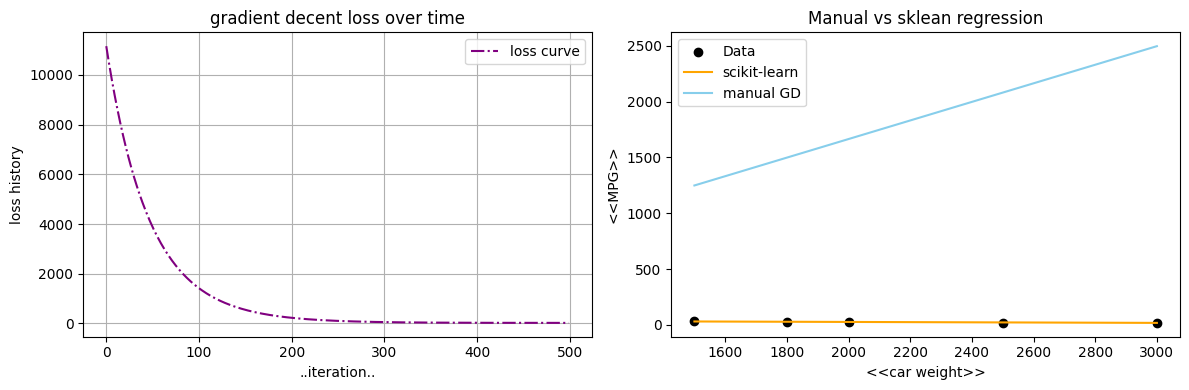

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(iteration),loss_history,label='loss curve',color='purple',linestyle='-.')
plt.xlabel('..iteration..')
plt.ylabel('loss history')
plt.title("gradient decent loss over time")
plt.grid()
plt.legend()

weight=np.random.rand()
bias=np.random.rand()
plt.subplot(1,2,2)
plt.scatter(X,y,label='Data',color='black')
plt.plot(X,model.predict(X),label='scikit-learn',color='orange')
plt.plot(X,weight*X + bias,label='manual GD',color='skyblue')
plt.xlabel('<<car weight>>')
plt.ylabel('<<MPG>>')
plt.legend()
plt.title("Manual vs sklean regression")


plt.tight_layout()
plt.show()
